**Preparing a toy multiclass dataset**

In [76]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from torch import nn
import warnings
from helper_functions import plot_decision_boundary
warnings.filterwarnings("ignore")

In [2]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

In [46]:
X_blob, y_blob = make_blobs(n_samples = 1000,
                           n_features=NUM_FEATURES,
                           centers=NUM_CLASSES,
                           cluster_std=1.5,
                           random_state=RANDOM_SEED)

In [47]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

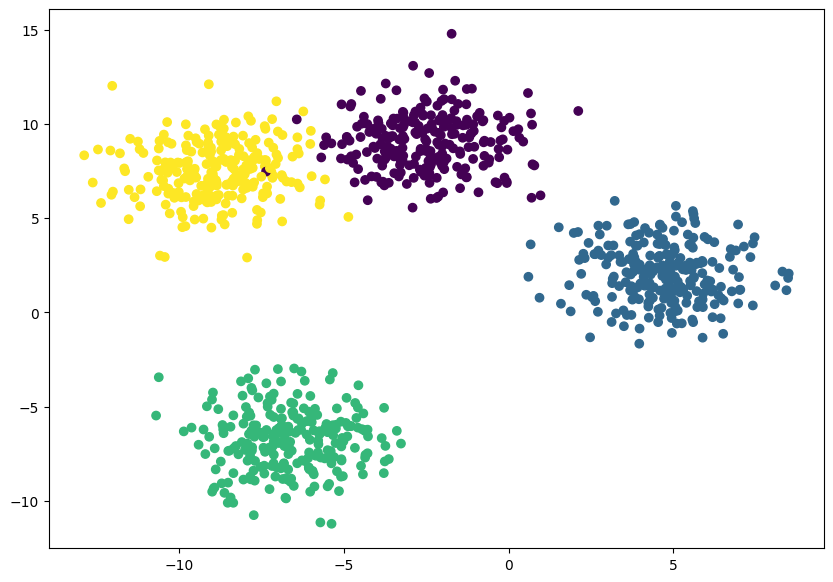

In [5]:
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:, 1], c=y_blob)

In [6]:
## Building a multiclass classification model

In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [13]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        '''Constructs a multiclass classification model
        Args:
          - input_features (int): Number of input features of the model
          - output_features (int): Number of output features(number of classes)
          - hidden units (int): Number of hidden units between labers default is 8
        '''
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )
    def forward(self, x):
        return self.linear_layer_stack(x)


In [14]:
model = BlobModel(input_features=2, output_features=4).to(device)

In [51]:
X_train, X_test = torch.from_numpy(X_blob_train).to(device).type(torch.float), torch.from_numpy(X_blob_test).to(device).type(torch.float)
y_train, y_test = torch.from_numpy(y_blob_train).to(device).type(torch.float), torch.from_numpy(y_blob_test).to(device).type(torch.float)

# what number of classes we have
torch.unique(y_train)

tensor([0., 1., 2., 3.], device='cuda:0')

In [67]:
# setting up loss and optimisation function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [37]:
# building a training loop
model.eval()
with torch.inference_mode():
    y_logits = model(X_test)
y_logits

tensor([[ 0.3680,  1.4553, -0.1166, -0.3841],
        [-0.6043,  0.5516,  0.1759, -0.3567],
        [-0.2363,  0.5649, -0.3265,  0.0432],
        [ 0.4340,  0.8167, -0.2061, -0.1589],
        [-0.5447,  1.4455,  0.4791, -0.7540],
        [-0.6512,  0.6518,  0.1742, -0.3671],
        [-0.2204,  0.5280, -0.2867,  0.0422],
        [-0.6821,  0.9590,  0.4699, -0.6355],
        [-0.2814,  0.6522, -0.3900,  0.0491],
        [-0.6345,  1.1083,  0.4780, -0.6800],
        [-0.7235,  0.7042,  0.4329, -0.5486],
        [ 0.4690,  1.6990, -0.1360, -0.3912],
        [-0.6224,  1.3386,  0.5185, -0.7553],
        [-0.7502,  1.1831,  0.5632, -0.7400],
        [-0.7747,  1.3414,  0.6154, -0.8074],
        [-0.6639,  0.4799,  0.2418, -0.3930],
        [-0.5886,  0.5709,  0.1558, -0.3461],
        [-0.1201,  0.3889, -0.3053,  0.0178],
        [-0.8326,  0.5810,  0.3452, -0.4683],
        [-0.3408,  0.5956, -0.0524, -0.2165],
        [-0.7973,  0.4940,  0.3195, -0.4502],
        [-0.5777,  0.6954,  0.3460

In [26]:
# converting the logits to labels
y_pred_probs = torch.softmax(y_logits, dim=1)

In [27]:
y_pred_probs

tensor([[0.1979, 0.5870, 0.1219, 0.0933],
        [0.1309, 0.4158, 0.2856, 0.1677],
        [0.1830, 0.4078, 0.1672, 0.2420],
        [0.2820, 0.4135, 0.1487, 0.1559],
        [0.0839, 0.6143, 0.2337, 0.0681],
        [0.1206, 0.4439, 0.2753, 0.1602],
        [0.1869, 0.3951, 0.1749, 0.2431],
        [0.0964, 0.4975, 0.3051, 0.1010],
        [0.1715, 0.4361, 0.1538, 0.2386],
        [0.0934, 0.5334, 0.2840, 0.0892],
        [0.1048, 0.4371, 0.3332, 0.1249],
        [0.1855, 0.6347, 0.1013, 0.0785],
        [0.0826, 0.5868, 0.2584, 0.0723],
        [0.0791, 0.5468, 0.2942, 0.0799],
        [0.0700, 0.5811, 0.2812, 0.0678],
        [0.1262, 0.3961, 0.3122, 0.1655],
        [0.1321, 0.4213, 0.2782, 0.1684],
        [0.2154, 0.3584, 0.1790, 0.2473],
        [0.1021, 0.4196, 0.3314, 0.1469],
        [0.1662, 0.4239, 0.2217, 0.1882],
        [0.1098, 0.3994, 0.3354, 0.1554],
        [0.1225, 0.4375, 0.3085, 0.1316],
        [0.2624, 0.3240, 0.2023, 0.2112],
        [0.2007, 0.3745, 0.1794, 0

In [38]:
y_preds = torch.argmax(y_pred_probs, dim=1)

In [39]:
y_preds,

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')

In [44]:
# calculate the accuracy - out of 100 examples what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [62]:
y_logits = model(X_train)
torch.softmax(y_logits, dim=1).argmax(dim=1), y_train

(tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1

In [74]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 100
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    # model training starts
    model.train()
    # forward propagate 
    y_logits = model(X_train)
    y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)
    # calculate the loss
    loss = loss_fn(y_logits, y_train.long())
    acc = accuracy_fn(y_pred=y_preds, y_true=y_train)
    # setup the back propagation
    optimizer.zero_grad()
    # back propagate
    loss.backward()
    optimizer.step() # gradient descent
    # testing mode
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
        test_loss = loss_fn(test_logits, y_test.long())
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss} | Test loss: {test_loss} | Train accuracy: {acc} | Test accuracy: {test_acc}")
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    epoch_count.append(epoch)

Epoch: 0 | Train Loss: 1.3528934717178345 | Test loss: 1.2666670083999634 | Train accuracy: 26.0 | Test accuracy: 20.5
Epoch: 10 | Train Loss: 0.7320510745048523 | Test loss: 0.7214812636375427 | Train accuracy: 74.875 | Test accuracy: 82.0
Epoch: 20 | Train Loss: 0.4579505920410156 | Test loss: 0.4318903386592865 | Train accuracy: 97.0 | Test accuracy: 98.5
Epoch: 30 | Train Loss: 0.19611960649490356 | Test loss: 0.16820940375328064 | Train accuracy: 98.75 | Test accuracy: 98.5
Epoch: 40 | Train Loss: 0.09797640889883041 | Test loss: 0.08221329003572464 | Train accuracy: 99.0 | Test accuracy: 98.5
Epoch: 50 | Train Loss: 0.06609980762004852 | Test loss: 0.054462794214487076 | Train accuracy: 99.0 | Test accuracy: 98.5
Epoch: 60 | Train Loss: 0.05246430262923241 | Test loss: 0.04236091673374176 | Train accuracy: 99.0 | Test accuracy: 98.5
Epoch: 70 | Train Loss: 0.04524938762187958 | Test loss: 0.035816945135593414 | Train accuracy: 99.0 | Test accuracy: 98.5
Epoch: 80 | Train Loss: 0.

In [75]:
# model evaluation
model.eval()
with torch.inference_mode():
    y_logits = model(X_test)
y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

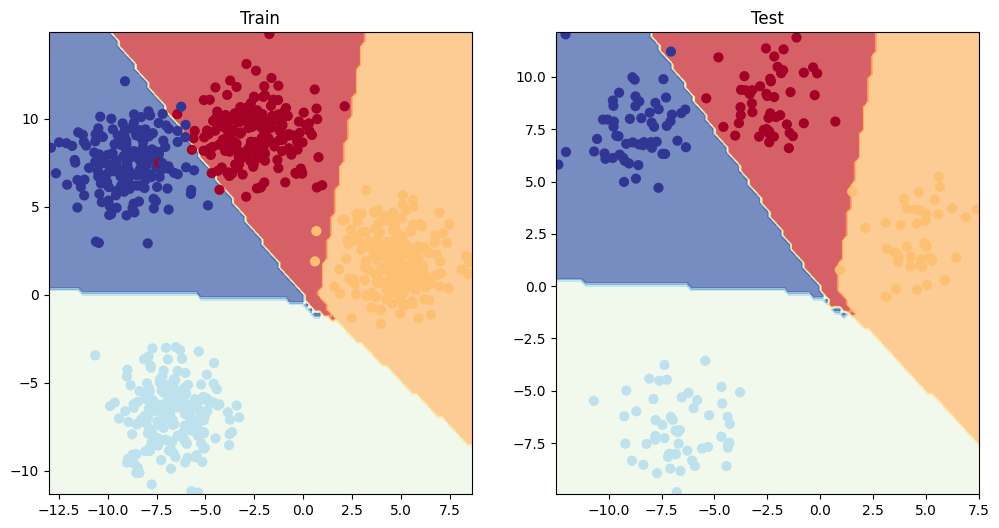

In [77]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)